In [40]:
import numpy as np

from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
drive.mount('/content/gdrive/')

!unzip -q /content/gdrive/My\ Drive/ML/dataset.zip -d train

Mounted at /content/gdrive/


In [3]:
DIRECTORY = '/content/train/dataset'
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32



In [26]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTORY,
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode = 'categorical',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTORY,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode = 'categorical',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

NUM_CLASSES = len(train_ds.class_names)

train_ds = train_ds.prefetch(buffer_size=BATCH_SIZE)
val_ds = val_ds.prefetch(buffer_size=BATCH_SIZE)

Found 11421 files belonging to 4 classes.
Using 9137 files for training.
Found 11421 files belonging to 4 classes.
Using 2284 files for validation.


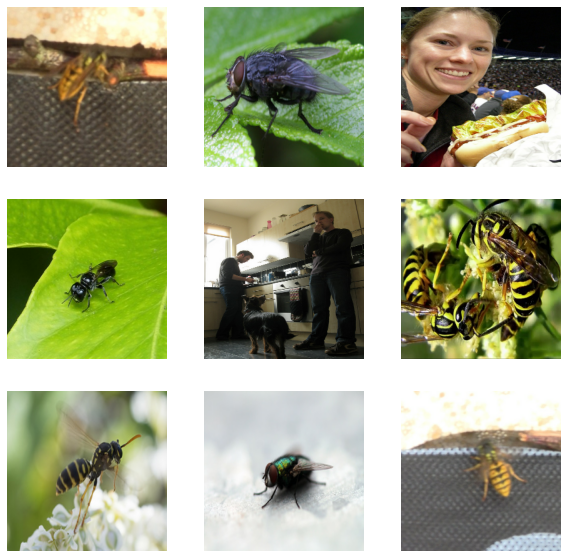

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(int(labels[i]))
        plt.axis("off")

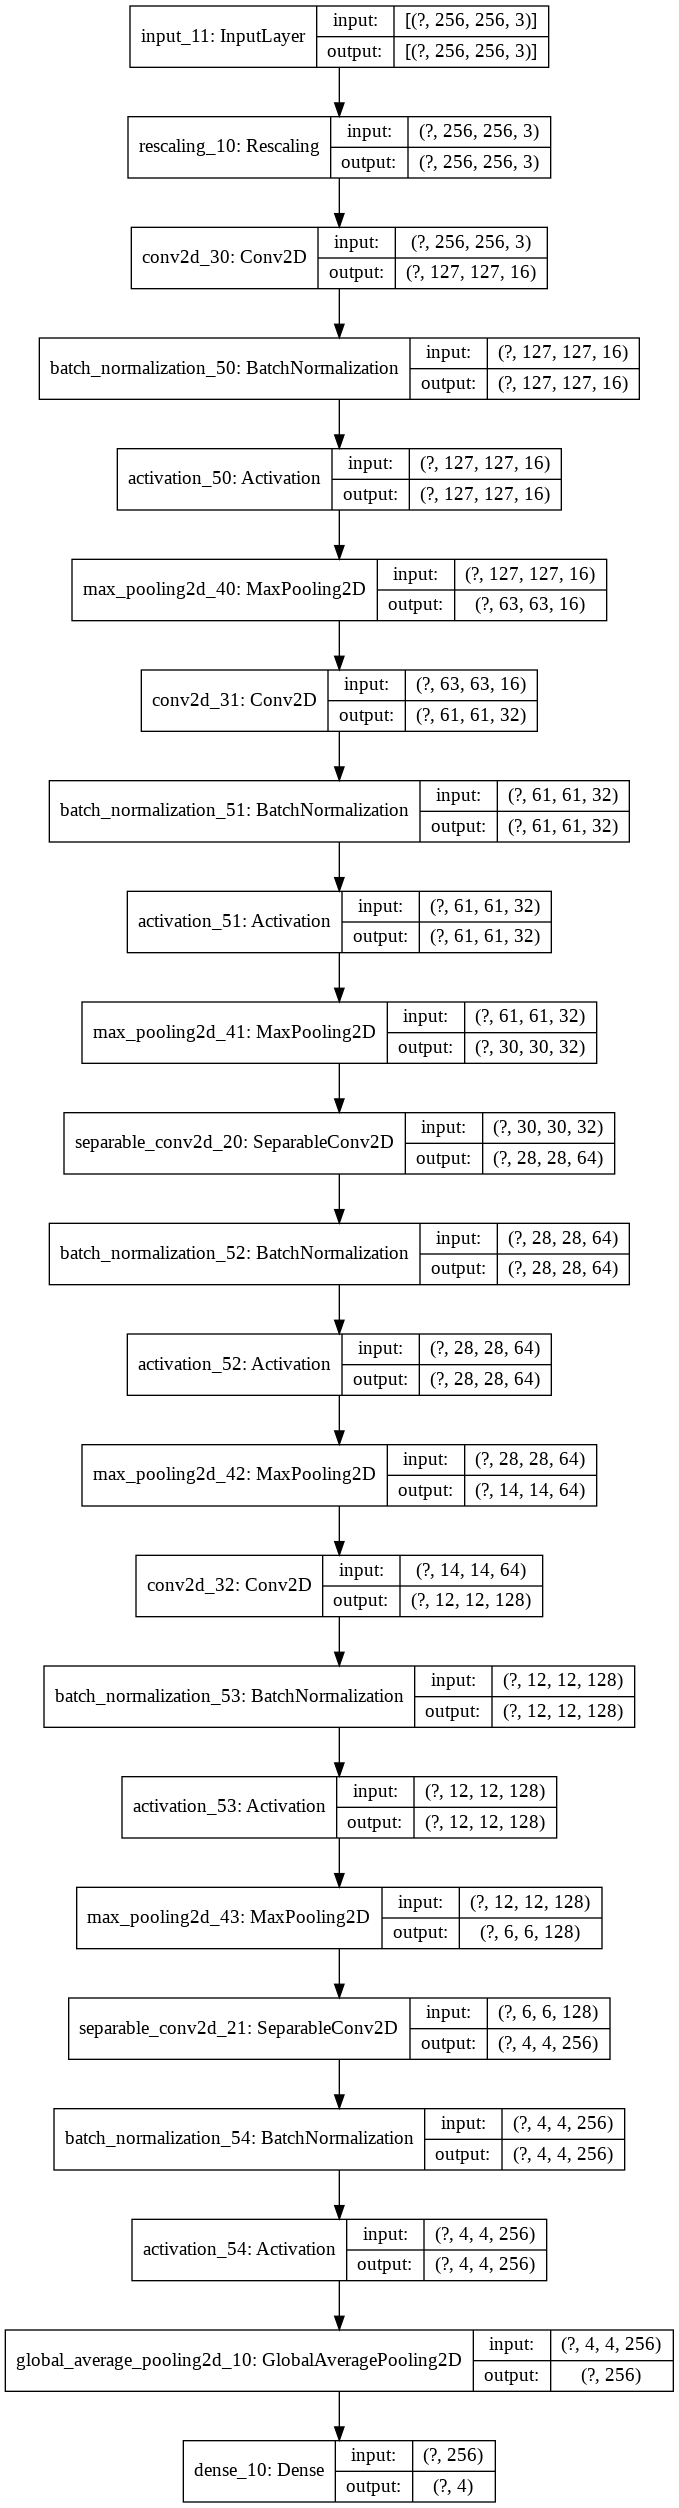

In [29]:

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)

    x = layers.Conv2D(16, 3, strides=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D()(x)

    x = layers.Conv2D(32, 3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D()(x)

    x = layers.SeparableConv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D()(x)

    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D()(x)

    x = layers.SeparableConv2D(256, 3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.GlobalAveragePooling2D()(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    #outputs = tf.keras.backend.argmax(probs, axis = 1)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=IMAGE_SIZE + (3,), num_classes=NUM_CLASSES)
keras.utils.plot_model(model, show_shapes=True)


In [31]:
epochs = 30

callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),]

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)#, callbacks=callbacks)

Epoch 1/30
286/286 [==============================] - 32s 111ms/step - loss: 0.7080 - accuracy: 0.7219 - val_loss: 1.3228 - val_accuracy: 0.4299
Epoch 2/30
286/286 [==============================] - 31s 110ms/step - loss: 0.5133 - accuracy: 0.8010 - val_loss: 0.6681 - val_accuracy: 0.7272
Epoch 3/30
286/286 [==============================] - 31s 109ms/step - loss: 0.4487 - accuracy: 0.8309 - val_loss: 0.6863 - val_accuracy: 0.7430
Epoch 4/30
286/286 [==============================] - 31s 109ms/step - loss: 0.3958 - accuracy: 0.8496 - val_loss: 0.9668 - val_accuracy: 0.6370
Epoch 5/30
286/286 [==============================] - 31s 109ms/step - loss: 0.3547 - accuracy: 0.8686 - val_loss: 0.5878 - val_accuracy: 0.7767
Epoch 6/30
286/286 [==============================] - 32s 111ms/step - loss: 0.3195 - accuracy: 0.8806 - val_loss: 0.7858 - val_accuracy: 0.7605
Epoch 7/30
286/286 [==============================] - 32s 111ms/step - loss: 0.2838 - accuracy: 0.8946 - val_loss: 0.6891 - val_ac

In [48]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

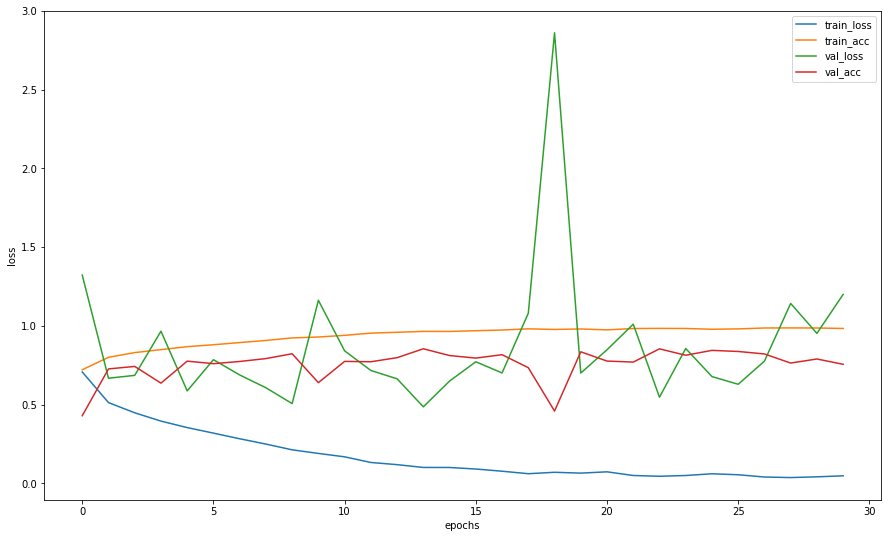

In [50]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(acc, label="train_acc")
plt.plot(val_loss, label="val_loss")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()